Vamos a aterrizar todo lo que hemos hecho en la clase

$$
\frac{d\vec p}{dt} = -G \frac{Mm}{|\vec r - \vec r_M |^2}\hat{(\vec r - \vec r_M) }
$$

vamos a supones que estamos en el plano donde sucede la acción y que nos ponemos en $ \vec r_M=0$. Vamos a adimencionalizar las cosas para que todo este escalado bonito. Es decir

$$
t_1 = \sqrt{GM}t \Rightarrow \frac{d}{dt} = \frac{d t_1}{dt}\frac{d}{dt_1} = \sqrt{GM}\frac{d}{dt_1} \Rightarrow \frac{d^2}{dt^2} = GM \frac{d^2}{dt_1^2}
$$

Vamos a hacwer ademas el cambio de variable $R_T=<\vec r(t)>$ y $\vec \rho = \frac{\vec r}{R_T}$
podemos escribir entonces la ec. a recolver como

$$
\frac{d\vec p}{dt} = -G \frac{Mm}{\rho^2 R_T^3}\hat{\rho }
$$

Hagamos entnces el cambio 

$$
\tau = \sqrt{\frac{GM}{R_T^3}}t \Rightarrow   \frac{d^2}{dt^2} = \frac{GM}{R_T^3} \frac{d^2}{d\tau^2}
$$

y por lo tanto 

$$
\frac{d^2\vec\rho}{d\tau^2} = - \frac{\vec \rho}{\rho^2} ---------------(1)
$$


Como cosa curiosa, vemos que si asumimos periocidad de 2Pi llegamos a la 3ra ley de Kepler

In [1]:
from pylab import *
%run "C:\Users\Jonathan\Documents\GitHub\integradores\int_rk_jac.ipynb"   #Importo las funciones que use aquí
%matplotlib inline

Vamos a utilizar varios métodos (ya importados arriba para reolver la ecuación de mov (ec. 1)

Vamos a hacer el cambio de variable siguiente para que sea una ec. de primer orden:
$$
\dot\rho_x = v_{\rho x}\\ \dot\rho_y = v_{\rho y} \\ \dot v_{\rho x} =- \frac{\rho_x}{\rho^3} \\  \dot v_{\rho y} =- \frac{\rho_y}{\rho^3}
$$



In [2]:
def mov_planeta(x,t):
    r3 = (x[0]**2 + x[1]**2)**(1.5)    #Así lo ponemos para que lo calcule un aúnica vez
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry =-x[1]/r3
    return array([drx,dry,dvrx,dvry])

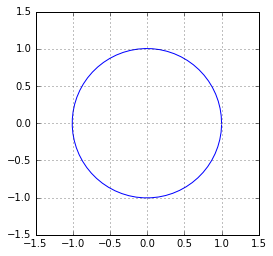

In [3]:
%%time
t,r_vr = rk2(mov_planeta,[1,0,0,1],[0,2*pi],0.1)
xlim([-1.5,1.5]),ylim([-1.5,1.5])  #El equivañente a Range y Domain en Mathematica
axes().set_aspect('equal'),grid(True)   #La maquilla
plot(r_vr[:,0],r_vr[:,1])   
show()

Aqui vamos a cambiar las condiciones para ver cómo camba la figura y vamos a modificar el paso que se utiliza

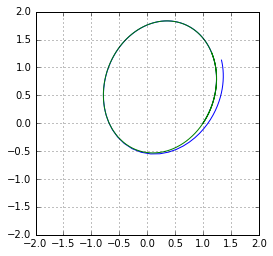

In [4]:
%%time
t,r_vr_1 = rk2(mov_planeta,[1,0,.6,.9],[0,10],0.1)
t,r_vr_01 = rk2(mov_planeta,[1,0,.6,.9],[0,10],0.01)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
axes().set_aspect('equal'),grid(True)   #La maquilla
plot(r_vr_1[:,0],r_vr_1[:,1],r_vr_01[:,0],r_vr_01[:,1])    #Me da es espacio fase
show()

Para seguir con el método del Jacobiano, primero hay que calcular éste:

$$ \mathbf{J} =\left(
\begin{array}{c c c c}
 0 & 0 & 1 & 0\\
 0 & 0 & 0 & 1\\
 \frac{2\rho_x^2-\rho_y^2}{\rho^5} & \frac{3\rho_x\rho_y}{\rho^5} & 0 & 0\\
 \frac{3\rho_x\rho_y}{\rho^5} & \frac{2\rho_y^2-\rho_x^2}{\rho^5} & 0 & 0
\end{array}\right)
$$

In [5]:
def jac_mov_planeta(x,t):
    d_ec =  array([0,0,0,0])  #parcial del sistema respecto a t
    r5 = (x[0]**2 + x[1]**2)**(2.5)
    rx2_ry=(2*x[0]*x[0]-x[1]*x[1])/r5
    rx3ry = (3*x[0]*x[1])/r5
    ry2_rx = (2*x[1]*x[1]-x[0]*x[0])/r5
    jac = array([0,0,1,0],[0,0,0,1],[rx2_ry,rx3ry,0,0],[rx3ry,ry2_rx,0,0])
    return d_ec, jac

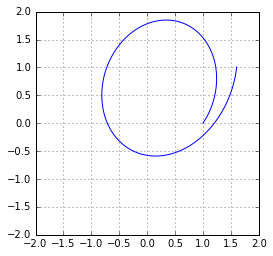

In [6]:
%%time
t,r_vr = integra2(mov_planeta,jac_mov_planeta,[1,0,.6,.9],[0,10],0.01)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom]) 
axes().set_aspect('equal'),grid(True)   #La maquilla
plot(r_vr[:,0],r_vr[:,1])   
show()

Ahora vamos a porner el RK de 4to orden

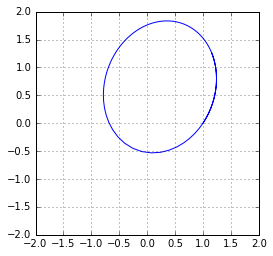

In [7]:
%%time
t,r_vr = rk4(mov_planeta,[1,0,.6,.9],[0,10],.1)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])  #El equivañente a Range y Domain en Mathematica
axes().set_aspect('equal'),grid(True)   #La maquilla
plot(r_vr[:,0],r_vr[:,1])    #Me da es espacio fase
show()

Aquí tenemos que poner el ode.int pero lo hago en la casa porque me da hueva
además tengo quer checar lo del tiempo de cálculo

y para internar graficar el espacio fase vamos a graficar las dos velocidades en un plano y veremos que no importa las condiciones iniciales que tenga, la gráfica simepre me dará un círculo. Esta se llama la odógrafa (oro?) y Rich nos va a explicar eso (tiene que ver con el vecor de velocidad y su magnitud segúin su ángulo)